# Importing modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import time
import random
import math
from IPython.display import clear_output

# Importing own code

In [2]:
from generateSpace import *
from plotLattice import *
from getTriangleLengths import *
from potentialEnergyPerTrio import *
from potentialEnergy import *
from potentialEnergyPerParticle import *
from numberOfCalculations import *
from makeRandomDatabase import *

## Auxiliarycode

In [3]:
def return1(lengths):
    return 1

def predictedCalculationTime(numberOfSurroundingCells, numberOfParticlesPerCell = 4, timePerTriangle = 15*(10**-6)):
    
    return timePerTriangle * numberOfCalculations(numberOfSurroundingCells, numberOfParticlesPerCell)

predictedCalculationTime(4, 4)

3.0912599999999997

# Testing

## Testing functionality

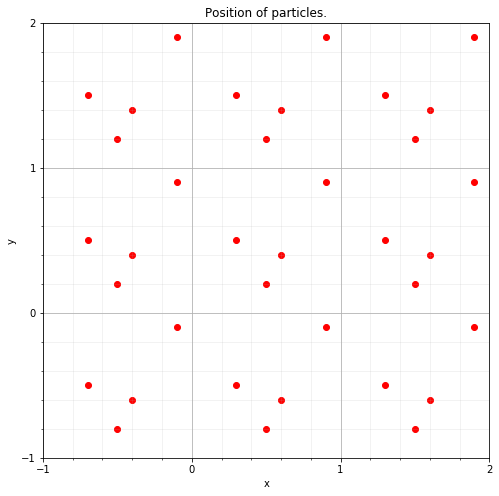

11266035.281433456

In [4]:
atoms = [np.array([0.3, 0.5]), np.array([0.9, 0.9]), np.array([0.6, 0.4]), np.array([0.5, 0.2])]

totalSpace = generateSpace(atoms, 1, 1.0, False)
plotLattice(totalSpace)

otherSpace = generateSpace(atoms, 1, 1.0)

potentialEnergy(otherSpace, atoms, potentialEnergyPerTrio)

In [5]:
potentialEnergy(generateSpace(atoms, 4, 1.0), atoms, return1)# Results from wolfram are 206084

206084

## Testing quality of potential energy particle

In [6]:
def potentialEnergyPerTrioExperimental(lengths):
    """
    """
    
    a = lengths[0]
    b = lengths[1]
    c = lengths[2]
    
    s = (a + b + c) / 2
    area2Triangle = s * (s - a) * (s - b) * (s - c)
    
    longRangePotential = (a**-8 + b**-8 + c**-8)#(a**-2 + b**-2 + c**-2)**4
    shortRangePotential = - 1000 * area2Triangle / (a**12 + b**12 + c**12)# - * area2Triangle / (a**12 + b**12 + c**12)
    
    return shortRangePotential + longRangePotential

Text(0, 0.5, 'Potential')

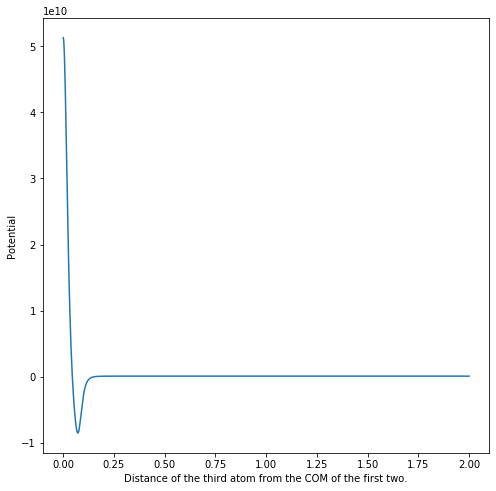

In [7]:
atoms = [np.array([0.0, 0.0]), np.array([0.1, 0.0])]

yCoordinates = np.linspace(0, 2, 1000, endpoint=True)

results =[]

for yCoordinate in yCoordinates:
    results.append(potentialEnergyPerTrioExperimental(getTriangleLengths(atoms[0], atoms[1], np.array([0.05, yCoordinate]))))

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(yCoordinates, results)
ax.set_xlabel('Distance of the third atom from the COM of the first two.')
ax.set_ylabel('Potential')

Text(0, 0.5, 'Potential')

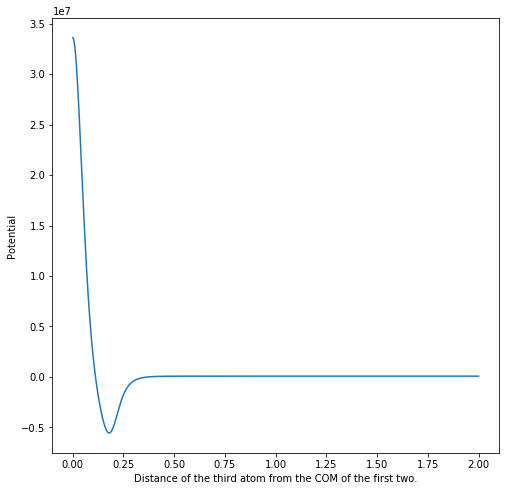

In [8]:
atoms = [np.array([0.0, 0.0]), np.array([0.25, 0.0])]

yCoordinates = np.linspace(0, 2, 1000, endpoint=True)

results =[]

for yCoordinate in yCoordinates:
    results.append(potentialEnergyPerTrioExperimental(getTriangleLengths(atoms[0], atoms[1], np.array([0.125, yCoordinate]))))

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(yCoordinates, results)
ax.set_xlabel('Distance of the third atom from the COM of the first two.')
ax.set_ylabel('Potential')

Text(0, 0.5, 'Potential')

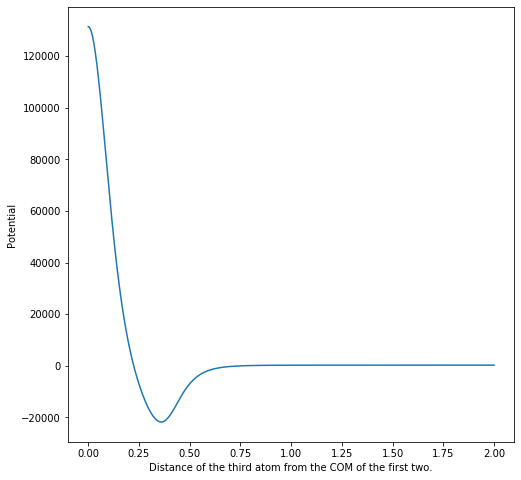

In [9]:
atoms = [np.array([0.0, 0.0]), np.array([0.5, 0.0])]

yCoordinates = np.linspace(0, 2, 1000, endpoint=True)

results =[]

for yCoordinate in yCoordinates:
    results.append(potentialEnergyPerTrioExperimental(getTriangleLengths(atoms[0], atoms[1], np.array([0.25, yCoordinate]))))

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(yCoordinates, results)
ax.set_xlabel('Distance of the third atom from the COM of the first two.')
ax.set_ylabel('Potential')

Text(0, 0.5, 'Potential')

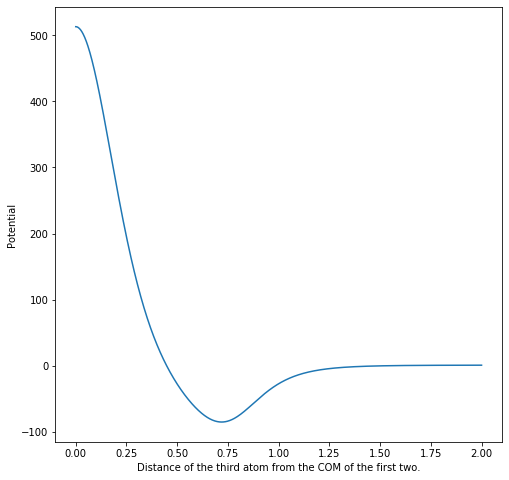

In [10]:
atoms = [np.array([0.0, 0.0]), np.array([1, 0.0])]

yCoordinates = np.linspace(0, 2, 1000, endpoint=True)

results =[]

for yCoordinate in yCoordinates:
    results.append(potentialEnergyPerTrioExperimental(getTriangleLengths(atoms[0], atoms[1], np.array([0.5, yCoordinate]))))

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(yCoordinates, results)
ax.set_xlabel('Distance of the third atom from the COM of the first two.')
ax.set_ylabel('Potential')

## Checking convergence

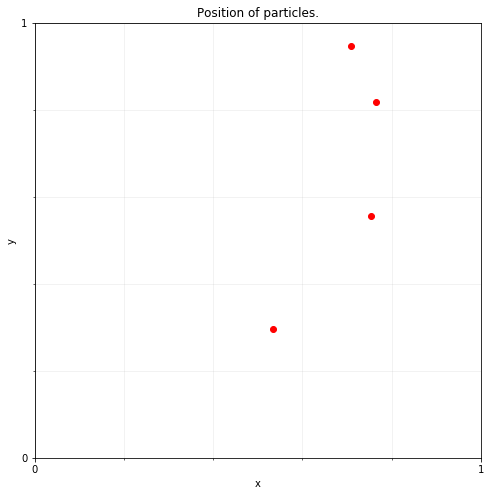

"\nfig, ax = plt.subplots(figsize=(8, 8))\nax.plot(numberOfSurroundingCells, timeForCalculation)\nax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')\nax.set_xlabel('Number of surrounding cells')\nax.set_ylabel('Time needed for the calculation (seconds)')"

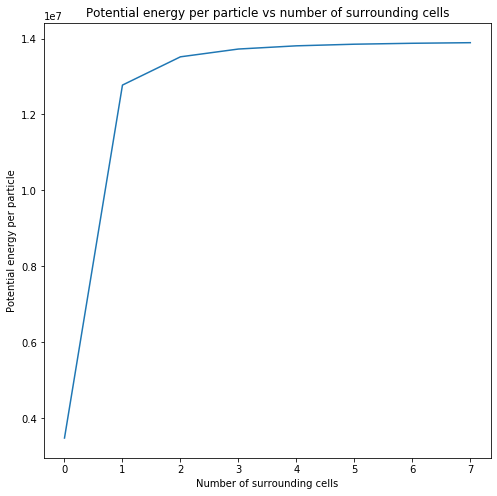

In [11]:
numberOfSurroundingCells = [i for i in range(0,8)]

potentialEnergyResults = []
timeForCalculation = []

atoms = [np.array([random.uniform(0, 1.0), random.uniform(0, 1.0)]) for j in range(0, 4)]

plotLattice(atoms)

for i in numberOfSurroundingCells:
    #print('Calculating with ' + str(i) + ' surrounding cells.')
    
    space = generateSpace(atoms, i, 1.0)
    
    timeStart = time.time()
    potentialEnergyResults.append(potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrioExperimental))
    timeEnd = time.time()
    #print((timeEnd - timeStart))
    timeForCalculation.append((timeEnd - timeStart))
    

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, potentialEnergyResults)
ax.set_title('Potential energy per particle vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Potential energy per particle')

"""
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, timeForCalculation)
ax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time needed for the calculation (seconds)')"""

Using the standard lattice


"\nfig, ax = plt.subplots(figsize=(8, 8))\nax.plot(numberOfSurroundingCells, timeForCalculation)\nax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')\nax.set_xlabel('Number of surrounding cells')\nax.set_ylabel('Time needed for the calculation (seconds)')"

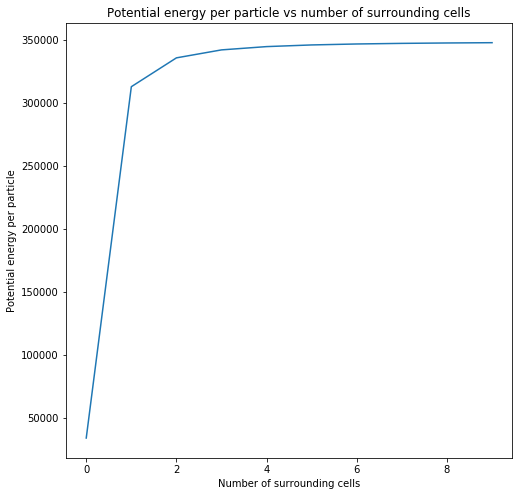

In [12]:
numberOfSurroundingCells = [i for i in range(0,10)]

potentialEnergyResults = []
timeForCalculation = []

atoms = [np.array([0.3, 0.5]), np.array([0.9, 0.9]), np.array([0.6, 0.4]), np.array([0.5, 0.2])]

print('Using the standard lattice')#plotLattice(atoms)

for i in numberOfSurroundingCells:
    #print('Calculating with ' + str(i) + ' surrounding cells.')
    
    space = generateSpace(atoms, i, 1.0)
    
    timeStart = time.time()
    potentialEnergyResults.append(potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrioExperimental))
    timeEnd = time.time()
    #print((timeEnd - timeStart))
    timeForCalculation.append((timeEnd - timeStart))
    

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, potentialEnergyResults)
ax.set_title('Potential energy per particle vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Potential energy per particle')

"""
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, timeForCalculation)
ax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time needed for the calculation (seconds)')"""

## Testing and predicting fucntion speed

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[2.0012855529785157e-06, 7.106924057006836e-05, 0.00020605087280273438, 0.0004020886421203613, 0.00067496919631958, 0.0010077943801879883, 0.0014145073890686035, 0.0018855524063110351, 0.0024216165542602537, 0.0030300321578979493, 0.0037119331359863283]


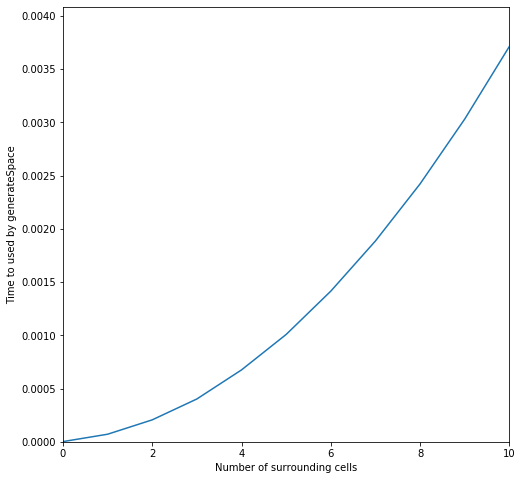

In [13]:
numberOfMeasurements = 500

xVariable = [i for i in range(0, 11)]
yVariable =[]

for i in xVariable:
    timeStart = time.time()
    [generateSpace(atoms, i, 1.0) for j in range(numberOfMeasurements)]
    timeEnd = time.time()
    yVariable.append((timeEnd - timeStart)/numberOfMeasurements)
    
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(xVariable, yVariable)
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time to used by generateSpace')
ax.set_xlim([min(xVariable), max(xVariable)])
ax.set_ylim([0, 1.1 * max(yVariable)])

print(xVariable)
print(yVariable)

In [14]:
%timeit potentialEnergyPerTrio(getTriangleLengths(np.array([0.3, 0.5]), np.array([0.9, 0.9]), np.array([0.6, 0.4])))

15.8 µs ± 48.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Calculating with 0 surrounding cells.
0.0003333091735839844
Calculating with 1 surrounding cells.
0.030010382334391277
Calculating with 2 surrounding cells.
0.24001495043436685
Calculating with 3 surrounding cells.
0.9455236593882242
Calculating with 4 surrounding cells.
2.6298422813415527
Calculating with 5 surrounding cells.
5.932627360026042
Calculating with 6 surrounding cells.
11.539703925450643
Calculating with 7 surrounding cells.
20.527790149052937
Calculating with 8 surrounding cells.
34.00769201914469
Calculating with 9 surrounding cells.
53.1501673857371
Calculating with 10 surrounding cells.
79.61799319585164

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0.0003333091735839844, 0.030010382334391277, 0.24001495043436685, 0.9455236593882242, 2.6298422813415527, 5.932627360026042, 11.539703925450643, 20.527790149052937, 34.00769201914469, 53.1501673857371, 79.61799319585164]
[5.9999999999999995e-05, 0.0327, 0.2823, 1.1175, 3.0912599999999997, 6.94086, 13.5879, 24.138299999999997, 39.882

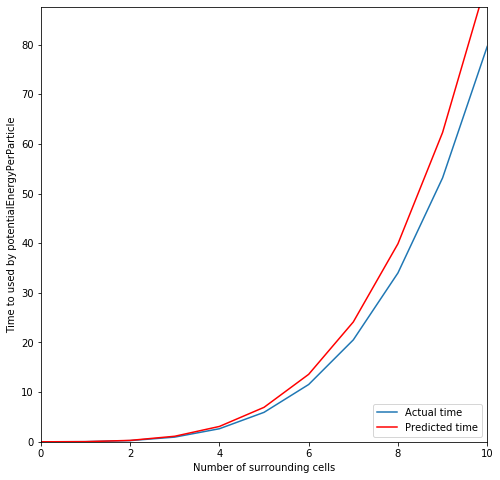

In [15]:
numberOfMeasurements = 3

atoms = [np.array([random.uniform(0, 1.0), random.uniform(0, 1.0)]) for j in range(0, 4)]

xVariable = [i for i in range(0, 11)]
yVariable =[]

for i in xVariable:
    print('Calculating with ' + str(i) + ' surrounding cells.')
    space = generateSpace(atoms, i, 1.0)
    timeStart = time.time()
    [potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrio) for j in range(numberOfMeasurements)]
    timeEnd = time.time()
    print((timeEnd - timeStart)/numberOfMeasurements)
    yVariable.append((timeEnd - timeStart)/numberOfMeasurements)

print('')
yVariablePredict = [predictedCalculationTime(i, len(atoms)) for i in xVariable]

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(xVariable, yVariable)
ax.plot(xVariable, yVariablePredict, c='r')
plt.legend(['Actual time', 'Predicted time' ], loc=4)
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time to used by potentialEnergyPerParticle')
ax.set_xlim([min(xVariable), max(xVariable)])
ax.set_ylim([0, 1.1 * max(yVariable)])

print(xVariable)
print(yVariable)
print([predictedCalculationTime(i, 4) for i in xVariable])